In [ ]:
import pandas as pd

def analyze_csv(file_path):
    # Read the CSV file, skipping bad lines and converting non-numeric data to NaN
    df = pd.read_csv(file_path)
    
    # Drop rows where any essential column has NaN
    df.dropna(subset=['Completed Rides', 'Total Distance', 'Total USD', 'Current Time', 'Number of Drivers', 'Number of Ride Requests', 'Number of Riders'], inplace=True)
    
    # Convert columns to numeric, forcing errors to NaN
    df['Completed Rides'] = pd.to_numeric(df['Completed Rides'], errors='coerce')
    df['Total Distance'] = pd.to_numeric(df['Total Distance'], errors='coerce')
    df['Total USD'] = pd.to_numeric(df['Total USD'], errors='coerce')
    df['Current Time'] = pd.to_numeric(df['Current Time'], errors='coerce')
    df['Number of Drivers'] = pd.to_numeric(df['Number of Drivers'], errors='coerce')
    df['Number of Ride Requests'] = pd.to_numeric(df['Number of Ride Requests'], errors='coerce')
    df['Number of Riders'] = pd.to_numeric(df['Number of Riders'], errors='coerce')
    
    # Drop rows with any NaN values after conversion
    df.dropna(inplace=True)

    # Calculate various metrics and trends
    trends = {}

    # 1. Average completed rides per simulation
    trends['Average Completed Rides per Simulation'] = df['Completed Rides'].mean()
    # Explanation: This trend shows the average number of rides completed per simulation run.
    # Example: If there are 3 simulation runs with 3, 4, and 5 completed rides respectively, the average would be (3 + 4 + 5) / 3 = 4.

    # 2. Total distance covered across all simulations
    trends['Total Distance Covered Across All Simulations'] = df['Total Distance'].sum()
    # Explanation: This trend shows the total distance covered in all completed rides across all simulations.
    # Example: If the total distances for 3 simulation runs are 12, 14, and 16, the total distance covered would be 12 + 14 + 16 = 42.

    # 3. Average earnings per simulation
    trends['Average Total USD Earned per Simulation'] = df['Total USD'].mean()
    # Explanation: This trend shows the average total earnings per simulation run.
    # Example: If the total earnings for 3 simulation runs are $30.0, $35.0, and $40.0, the average earnings would be (30.0 + 35.0 + 40.0) / 3 = $35.0.

    # 4. Average time taken per simulation
    trends['Average Total Time per Simulation'] = df['Current Time'].mean()
    # Explanation: This trend shows the average total time taken to complete all rides per simulation run.
    # Example: If the total times for 3 simulation runs are 39, 38, and 37 minutes, the average time would be (39 + 38 + 37) / 3 = 38 minutes.

    # 5. Distribution of completed rides
    trends['Distribution of Completed Rides'] = df['Completed Rides'].value_counts().to_dict()
    # Explanation: This trend shows how frequently different numbers of completed rides occur across simulations.
    # Example: If there are 3 simulation runs with 3 completed rides and 2 runs with 4 completed rides, the distribution would be {3: 3, 4: 2}.

    # 6. Correlation between total distance and total earnings
    trends['Correlation between Total Distance and Total USD'] = df['Total Distance'].corr(df['Total USD'])
    # Explanation: This trend measures the relationship between the total distance covered and the total earnings.
    # Example: A correlation of 0.9 would indicate a strong positive relationship, meaning higher distances are associated with higher earnings.

    # 7. Average number of ride requests per driver
    trends['Average Number of Ride Requests per Driver'] = df['Number of Ride Requests'].mean() / df['Number of Drivers'].mean()
    # Explanation: This trend shows the average number of ride requests each driver receives at the start of the simulation.
    # Example: If there are 3 drivers and 9 ride requests in a simulation, the average number of ride requests per driver would be 9 / 3 = 3.

    # 8. Average number of rides per rider
    trends['Average Number of Rides per Rider'] = df['Completed Rides'].sum() / df['Number of Riders'].mean()
    # Explanation: This trend shows the average number of rides each rider completes across all simulations.
    # Example: If there are 12 completed rides and 4 riders in total, the average number of rides per rider would be 12 / 4 = 3.

    # 9. Maximum earnings in a single simulation
    trends['Maximum Total USD Earned in a Single Simulation'] = df['Total USD'].max()
    # Explanation: This trend shows the highest total earnings recorded in a single simulation run.
    # Example: If the highest total earnings in a single simulation run are $50.0, this value would be $50.0.

    # 10. Variance in total time per simulation
    trends['Variance in Total Time per Simulation'] = df['Current Time'].var()
    # Explanation: This trend measures the variability in the total time taken to complete all rides across simulations.
    # Example: If the times are 39, 38, and 37 minutes, the variance would measure how much the times differ from the average (38 minutes).

    return trends

# Example usage
file_path = "/Users/sayertindall/Documents/GitHub/block.science/rideshare/research/DataViews/ResultsTracker.csv"
trends = analyze_csv(file_path)

# Print the trends
for key, value in trends.items():
    print(f"\n{key}: {value}")


### Explanation of Trends with Calculations:

1. **Average Completed Rides per Simulation:**
   - Shows the average number of rides completed per simulation run.
   - Calculation: `df['Completed Rides'].mean()`
   - Example: If there are 3 simulation runs with 3, 4, and 5 completed rides respectively, the average would be (3 + 4 + 5) / 3 = 4.

2. **Total Distance Covered Across All Simulations:**
   - Shows the total distance covered in all completed rides across all simulations.
   - Calculation: `df['Total Distance'].sum()`
   - Example: If the total distances for 3 simulation runs are 12, 14, and 16, the total distance covered would be 12 + 14 + 16 = 42.

3. **Average Earnings per Simulation:**
   - Shows the average total earnings per simulation run.
   - Calculation: `df['Total USD'].mean()`
   - Example: If the total earnings for 3 simulation runs are $30.0, $35.0, and $40.0, the average earnings would be (30.0 + 35.0 + 40.0) / 3 = $35.0.

4. **Average Time Taken per Simulation:**
   - Shows the average total time taken to complete all rides per simulation run.
   - Calculation: `df['Current Time'].mean()`
   - Example: If the total times for 3 simulation runs are 39, 38, and 37 minutes, the average time would be (39 + 38 + 37) / 3 = 38 minutes.

5. **Distribution of Completed Rides:**
   - Shows how frequently different numbers of completed rides occur across simulations.
   - Calculation: `df['Completed Rides'].value_counts().to_dict()`
   - Example: If there are 3 simulation runs with 3 completed rides and 2 runs with 4 completed rides, the distribution would be {3: 3, 4: 2}.

6. **Correlation between Total Distance and Total Earnings:**
   - Measures the relationship between the total distance covered and the total earnings.
   - Calculation: `df['Total Distance'].corr(df['Total USD'])`
   - Example: A correlation of 0.9 would indicate a strong positive relationship, meaning higher distances are associated with higher earnings.

7. **Average Number of Ride Requests per Driver:**
   - Shows the average number of ride requests each driver receives at the start of the simulation.
   - Calculation: `df['Number of Ride Requests'].mean() / df['Number of Drivers'].mean()`
   - Example: If there are 3 drivers and 9 ride requests in a simulation, the average number of ride requests per driver would be 9 / 3 = 3.

8. **Average Number of Rides per Rider:**
   - Shows the average number of rides completed by each rider across all simulations.
   - Calculation: `df['Completed Rides'].sum() / df['Number of Riders'].mean()`
   - Example: If there are 12 completed rides and 4 riders in total, the average number of rides per rider would be 12 / 4 = 3.

9. **Maximum Earnings in a Single Simulation:**
   - Shows the highest total earnings recorded in a single simulation run.
   - Calculation: `df['Total USD'].max()`
   - Example: If the highest total earnings in a single simulation run are $50.0, this value would be $50.0.

10. **Variance in Total Time per Simulation:**
    - Measures the variability in the total time taken to complete all rides across simulations.
    - Calculation: `df['Current Time'].var()`
    - Example: If the times are 39, 38, and 37 minutes, the variance would measure how much the times differ from the average (38 minutes).

In [2]:
seed = 100
upper_limit = 75000
file_path = "/Users/sayertindall/Documents/GitHub/block.science/rideshare/research/DataViews/ResultsTracker2.csv"
%run event.py {seed} {upper_limit} {file_path}


Grid dimensions: 15 15
Number of Zones: 225
Number of Nodes: 225
Number of Edges: 840
Number of Riders: 1860
Number of Drivers: 1824
Number of Ride Requests: 1860


Processing event: Event(t=1, action='Request Ride', spaces={'ride_id': 1806}) at time 1
Handling ride request event for ride 1806 at time 1
Driver Driver 0 assigned to ride 1806 at time 28
Processing event: Event(t=1, action='Request Ride', spaces={'ride_id': 762}) at time 1
Handling ride request event for ride 762 at time 1
Driver Driver 1 assigned to ride 762 at time 47
Processing event: Event(t=2, action='Request Ride', spaces={'ride_id': 1745}) at time 2
Handling ride request event for ride 1745 at time 2
Driver Driver 2 assigned to ride 1745 at time 34
Processing event: Event(t=2, action='Request Ride', spaces={'ride_id': 1398}) at time 2
Handling ride request event for ride 1398 at time 2
Driver Driver 3 assigned to ride 1398 at time 8
Processing event: Event(t=2, action='Request Ride', spaces={'ride_id': 1136}) at ti

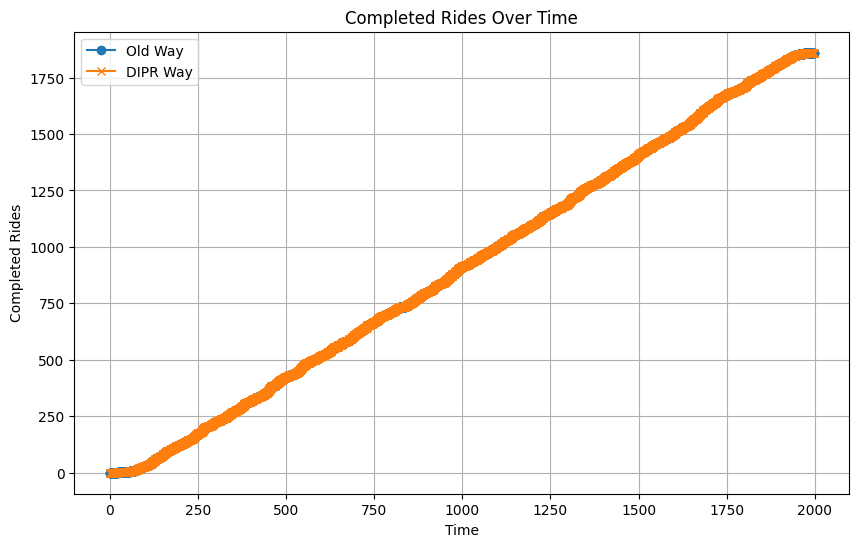

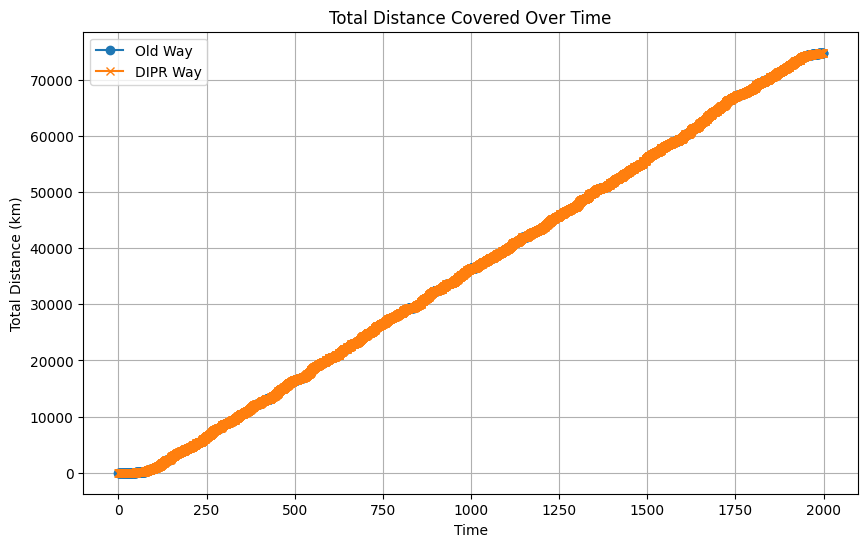

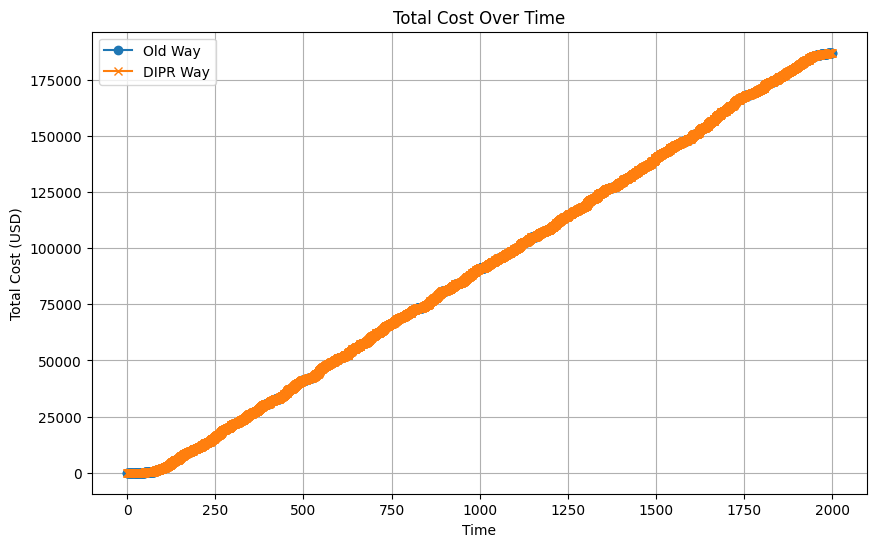

Time to complete all rides (Old Way): 1998 time steps
Time to complete all rides (DIPR Way): 1998 time steps
Both methods are equally fast.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load state maps from the simulations
state_map_old_way = pd.read_csv('/Users/sayertindall/Documents/GitHub/block.science/rideshare/experiments/working/events/state_map_linear.csv')
state_map_DIPR_way = pd.read_csv('/Users/sayertindall/Documents/GitHub/block.science/rideshare/experiments/working/events/state_map_linear.csv')

def plot_metric_comparison(state_map1, state_map2, metric, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(state_map1['time'], state_map1[metric], label='Old Way', marker='o')
    plt.plot(state_map2['time'], state_map2[metric], label='DIPR Way', marker='x')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot and compare the metrics
plot_metric_comparison(state_map_old_way, state_map_DIPR_way, 'completed_rides', 'Completed Rides Over Time', 'Completed Rides')
plot_metric_comparison(state_map_old_way, state_map_DIPR_way, 'total_distance', 'Total Distance Covered Over Time', 'Total Distance (km)')
plot_metric_comparison(state_map_old_way, state_map_DIPR_way, 'total_cost', 'Total Cost Over Time', 'Total Cost (USD)')

# Determine the time steps taken to complete all rides
time_to_complete_old = state_map_old_way[state_map_old_way['completed_rides'] == state_map_old_way['completed_rides'].max()]['time'].min()
time_to_complete_DIPR = state_map_DIPR_way[state_map_DIPR_way['completed_rides'] == state_map_DIPR_way['completed_rides'].max()]['time'].min()

print(f"Time to complete all rides (Old Way): {time_to_complete_old} time steps")
print(f"Time to complete all rides (DIPR Way): {time_to_complete_DIPR} time steps")

# Determine which method is faster
if time_to_complete_old < time_to_complete_DIPR:
    print("The old way is faster.")
elif time_to_complete_old > time_to_complete_DIPR:
    print("The DIPR way is faster.")
else:
    print("Both methods are equally fast.")
